In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

def Potencia(B):

    # Constantes
    D = 10000
    nu  =  0.8    # Coeficiente de fricción 
    c   =  300000        # km/S
    k   =  1 # Boltzmann
    U   =  np.linspace(c,0,0,0)    # Velocidad del baño térmico
    m   =  2.0 #masa
    
    q= 0.05 #carga
    v01= 2000
    v02= 1500
    v03= 1000
    vv0=v01**2+v02**2+v03**2
    G0=1/np.sqrt(1-(vv0/c**2)) #Gamma inicial

    etalista=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
    eta=np.array(etalista)

    ubetalista=[G0*c,G0*v01,G0*v02,G0*v03]
    ub0=np.array(ubetalista)

    ualfalista=[-G0*c,G0*v01,G0*v02,G0*v03]
    ua0=np.array(ualfalista)

    d=4
    nu0 = np.zeros((d,d))
    for i in range (4):
        for j in range (4):
            nu0[i,j]=nu*(eta[i,j]+((ub0[i]*ua0[j])/c**2))

    Flista=[[0,0,0,0],[0,0,B,0],[0,-B,0,0],[0,0,0,0]]
    F=np.array(Flista)
    
# =====================================================================================================================  
# Parametros de la simulación.
# =====================================================================================================================  
    dt  = .01                     # Time step.
    T   = 1000                    # Total time.
    n   = int(T / dt)            # Number of time steps.
    d   = 1+3                   # Dimensions
# =====================================================================================================================  
# Aqui configuro los valores inciales para poder iniciar la simulación, es necesario renombrarlos porque en el for van a cambiar
# de valor.
# =====================================================================================================================  
    v1=np.zeros(n)
    v2=np.zeros(n)
    v3=np.zeros(n)
    ub=ub0
    ua=ua0
    vv=np.zeros(n)
    G=np.zeros(n)

    v1[0]=v01
    v2[0]=v02
    v3[0]=v03
    vv[0]=vv0
    G[0]=G0

    P=np.zeros((d,n))

    P[0,0]=m*ub0[0]
    P[1,0]=m*ub0[1]
    P[2,0]=m*ub0[2]
    P[3,0]=m*ub0[3]

    X=np.zeros((d,n))

    X[0,0]=0
    X[1,0]=0
    X[2,0]=0
    X[3,0]=0

    Beta1 = np.zeros(n)
    Beta2 = np.zeros(n)
    Beta3 = np.zeros(n)
    Betaprima1 = np.zeros(n)
    Betaprima2 = np.zeros(n)
    Betaprima3 = np.zeros(n)
    Beta = np.zeros(n)
    Betaprima = np.zeros(n)

    Pow = np.zeros(n)

    Nu=nu0

    for i in range(n -1):
        sigma = np.sqrt(2*D*G[i]*dt)
        mu = 0
        P[0,i+1]= P[0,i] - Nu[0,0]*(P[0,i]-m*c)*dt - Nu[0,1]*P[1,i]*dt - Nu[0,2]*P[2,i]*dt - Nu[0,3]*P[3,i]*dt + (F[0,0]*ub[0])*q*dt + (F[0,1]*ub[1])*q*dt + (F[0,2]*ub[2])*q*dt + (F[0,3]*ub[3])*q*dt + np.random.normal(mu, sigma,1)
        P[1,i+1]= P[1,i] - Nu[1,0]*(P[0,i]-m*c)*dt - Nu[1,1]*P[1,i]*dt - Nu[1,2]*P[2,i]*dt - Nu[1,3]*P[3,i]*dt + (F[1,0]*ub[0])*q*dt + (F[1,1]*ub[1])*q*dt + (F[1,2]*ub[2])*q*dt + (F[1,3]*ub[3])*q*dt + np.random.normal(mu, sigma,1)
        P[2,i+1]= P[2,i] - Nu[2,0]*(P[0,i]-m*c)*dt - Nu[2,1]*P[1,i]*dt - Nu[2,2]*P[2,i]*dt - Nu[2,3]*P[3,i]*dt + (F[2,0]*ub[0])*q*dt + (F[2,1]*ub[1])*q*dt + (F[2,2]*ub[2])*q*dt + (F[2,3]*ub[3])*q*dt + np.random.normal(mu, sigma,1)
        P[3,i+1]= P[3,i] - Nu[3,0]*(P[0,i]-m*c)*dt - Nu[3,1]*P[1,i]*dt - Nu[3,2]*P[2,i]*dt - Nu[3,3]*P[3,i]*dt + (F[3,0]*ub[0])*q*dt + (F[3,1]*ub[1])*q*dt + (F[3,2]*ub[2])*q*dt + (F[3,3]*ub[3])*q*dt + np.random.normal(mu, sigma,1)
    
        v1[i+1]  = (m*P[1,i+1]*c)/P[0,i+1]
        v2[i+1]  = (m*P[2,i+1]*c)/P[0,i+1]
        v3[i+1]  = (m*P[3,i+1]*c)/P[0,i+1]
    
        X[0,i+1] = X[0,i] + (P[0,i]/m)*dt
        X[1,i+1] = X[1,i] + (P[1,i]/m)*dt
        X[2,i+1] = X[2,i] + (P[2,i]/m)*dt
        X[3,i+1] = X[3,i] + (P[3,i]/m)*dt
    
        vv[i+1] = ((v1[i+1]**2)+(v2[i+1]**2)+(v3[i+1]**2))
        G[i+1] = 1/np.sqrt(1-(vv[i+1]/c**2))
    
    
        ubetalista=[G[i+1]*c,G[i+1]*v1[i+1],G[i+1]*v2[i+1],G[i+1]*v3[i+1]]
        ub=np.array(ubetalista)
   
        ualfalista=[-G[i+1]*c,G[i+1]*v1[i+1],G[i+1]*v2[i+1],G[i+1]*v3[i+1]]
        ua=np.array(ualfalista)
    
# =====================================================================================================================  
# Potencia
# =====================================================================================================================  
    
        Beta1[i] = v1[i]/c
        Betaprima1[i] = (Beta1[i+1]-Beta1[i])/dt
        Beta2[i] = v2[i]/c
        Betaprima2[i] = (Beta2[i+1]-Beta2[i])/dt
        Beta3[i] = v3[i]/c
        Betaprima3[i] = (Beta3[i+1]-Beta3[i])/dt
    
        Beta = np.asarray([Beta1[i],Beta2[i],Beta3[i]]) 
        Betaprima = np.asarray([Betaprima1[i],Betaprima2[i],Betaprima3[i]])
    
        Pow[i] = ((2*q**2*G[i]**6)/3*c)*(np.linalg.norm(Betaprima)-(np.linalg.norm(np.cross(Beta,Betaprima))))
    
        for k in range (4):
            for l in range (4):
                Nu[k,l]=nu*(eta[k,l]+((ub[k]*ua[l])/c**2)) 

   

    t = np.arange(0,T,dt)

    return (t,Pow)


<ipython-input-10-e33f3e78a134>:91: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000020A05698F10>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  fig.legend(handles=line_handles, labels=line_labels, loc="center right", borderaxespad=0.2, title="", fontsize = 8)
<ipython-input-10-e33f3e78a134>:91: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000020A056A62E0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  fig.legend(handles=line_handles, labels=line_labels, loc="center right", borderaxespad=0.2, title="", fontsize = 8)
<ipython-input-10-e33f3e78a134>:91: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000020A056A6670>] instances.
A proxy artist may 

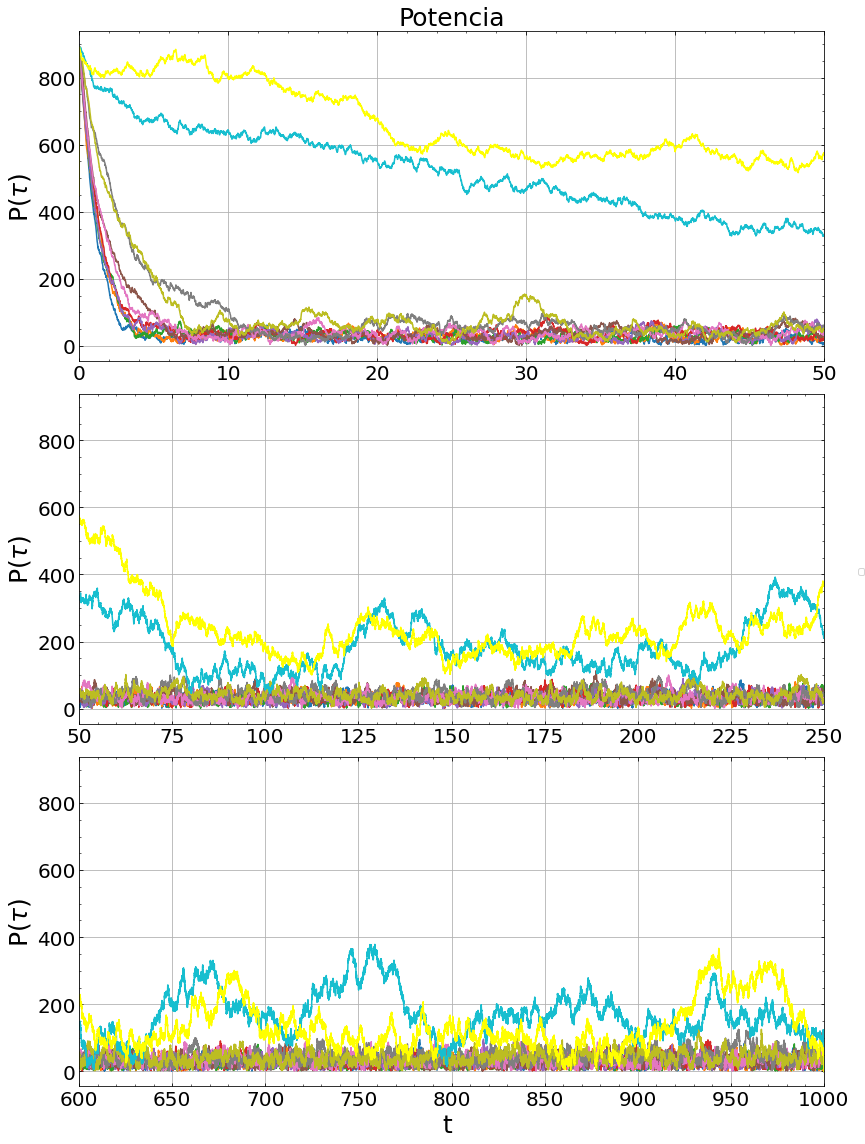

In [10]:
# =====================================================================================================================  
# Calling function
# =====================================================================================================================  

t,power0  = Potencia(0)
t,power1  = Potencia(-50)
t,power2  = Potencia(50)
t,power3  = Potencia(-100)
t,power4  = Potencia(100)
t,power5  = Potencia(-150)
t,power6  = Potencia(150)
t,power7  = Potencia(-200)
t,power8  = Potencia(200)
t,power9  = Potencia(-250)
t,power10 = Potencia(250)

# =====================================================================================================================  
# Plots
# =====================================================================================================================  
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3,1,figsize=(12,16))

line_labels = ["B = 0 T" , "B = -50 T" , "B = 50 T" , "B = -100 T" , "B = 100 T" , "B = -150 T" , "B = 150 T" , "B = -200 T",
               "B = 200 T", "B = -250 T" , "B = 250 T" ]

ax1.plot(t,power0,color="tab:blue")
ax1.plot(t,power1,color="tab:orange")
ax1.plot(t,power2,color="tab:green")
ax1.plot(t,power3,color="tab:red")
ax1.plot(t,power4,color="tab:purple")
ax1.plot(t,power5,color="tab:brown")
ax1.plot(t,power6,color="tab:pink")
ax1.plot(t,power7,color="tab:grey")
ax1.plot(t,power8,color="tab:olive")
ax1.plot(t,power9,color="tab:cyan")
ax1.plot(t,power10,color="yellow")
ax1.set_title('Potencia',alpha=1 ,fontsize = '25', color='black')
ax1.set_xlim([0,50])
#ax1.set_xlabel('t ',alpha=1 ,fontsize = '25', color='black')
ax1.set_ylabel('P($\\tau$)',alpha=1 ,fontsize = '25', color='black')
ax1.grid()
ax1.minorticks_on()
ax1.tick_params(bottom=True,top=True,right=True,direction='in',which='both', labelsize = '20', color='black')




ax2.plot(t,power0,color="tab:blue")
ax2.plot(t,power1,color="tab:orange")
ax2.plot(t,power2,color="tab:green")
ax2.plot(t,power3,color="tab:red")
ax2.plot(t,power4,color="tab:purple")
ax2.plot(t,power5,color="tab:brown")
ax2.plot(t,power6,color="tab:pink")
ax2.plot(t,power7,color="tab:grey")
ax2.plot(t,power8,color="tab:olive")
ax2.plot(t,power9,color="tab:cyan")
ax2.plot(t,power10,color="yellow")
#plt.title('Potencia',alpha=1 ,fontsize = '25', color='black')
ax2.set_xlim([50,250])
#ax2.set_xlabel('t ',alpha=1 ,fontsize = '25', color='black')
ax2.set_ylabel('P($\\tau$)',alpha=1 ,fontsize = '25', color='black')
ax2.grid()
ax2.minorticks_on()
ax2.tick_params(bottom=True,top=True,right=True,direction='in',which='both', labelsize = '20', color='black')





ax3.plot(t,power0,color="tab:blue")
ax3.plot(t,power1,color="tab:orange")
ax3.plot(t,power2,color="tab:green")
ax3.plot(t,power3,color="tab:red")
ax3.plot(t,power4,color="tab:purple")
ax3.plot(t,power5,color="tab:brown")
ax3.plot(t,power6,color="tab:pink")
ax3.plot(t,power7,color="tab:grey")
ax3.plot(t,power8,color="tab:olive")
ax3.plot(t,power9,color="tab:cyan")
ax3.plot(t,power10,color="yellow")
#plt.title('Potencia',alpha=1 ,fontsize = '25', color='black')
ax3.set_xlim([600,1000])
ax3.set_xlabel('t ',alpha=1 ,fontsize = '25', color='black')
ax3.set_ylabel('P($\\tau$)',alpha=1 ,fontsize = '25', color='black')
ax3.grid()
ax3.minorticks_on()
ax3.tick_params(bottom=True,top=True,right=True,direction='in',which='both', labelsize = '20', color='black')




plt.tight_layout()
plt.savefig("POWER.png",dpi=600)
